# Исследуем наличие минимума у функции $f(x) = xe^x + sin(e^x)$ на отрезке $x \in [-5, 0]$

Вычислим производную $f^{'}(x) = xe^x + e^x + e^x cos(e^x) = e^x(1 + x + cos(e^x))$. Её знак, а значит, и характер монотонности функции $f(x)$ определяется знаком функции $g(x) = 1 + x + cos(e^x)$. Определим характер монотонотонности данной функции на отрезке $x \in [-5, 0]$. Для этого вычислим производную $g^{'}(x) = 1 - e^xsin(e^x)$. Замечаем, что на отрезке $x \in [-5, 0]$ $e^x \leq 1 \rightarrow |e^xsin(e^x)| \leq 1 \rightarrow 1 + e^xsin(e^x) > 0$ (достигалось бы нуля, если было выполнено одновременно $e^x = 1, sin(e^x) = -1$) Таким образом, согласно теоремам из матанализа, получаем, что функция $g(x)$ монотонно возрастает на отрезке $x \in [-5,0]$, тогда на этом же отрезке $g(x)$ может иметь не больше одного нуля. Проверим это, вычислив $g(-5) = 1 + (-5) + cos(e^{-5}) < 0$ и $g(0) = 1 + 0 + cos(e^0) > 0$. В силу непрерывности $g(x)$ на отрезке $[-5, 0]$ по теореме Коши о промежуточном значении, существует корень уравнения $g(x_0) = 0, x_0 \in (-5, 0)$. Из монотонного возрастания $g(x)$ на $x \in [-5, 0]$ следует, что $g(x) < 0$ при $x \in [-5, x_0)$ и $g(x) > 0$ при $x \in (x_0, 0]$. Таким образом, $f^{'}(x) > 0$ при $x \in (x_0, 0]$ и $f^{'}(x) < 0$ при $x \in [-5, x_0), f^{'}(x_0) = 0$. Из достаточных условий экстремума функции одной переменной это означает, что $f(x)$ имеет минимум в точке $x_0 \in (-5, 0)$, являющейся корнем уравнения $1 + x + cos(e^x) = 0$, при этом других минимумов функции $f(x)$ на отрезке $[-5, 0]$ нет. Это показывает, что наша функция $f(x)$ является унимодальной на отрезке $[-5,0]$, так что при написании кода можем пользоваться корректностью метода дихотомии, который мы изменим, деля отрезок в другом отношении.

# Напишем код, аналогичный методу дихотомии с постоянным шагом t

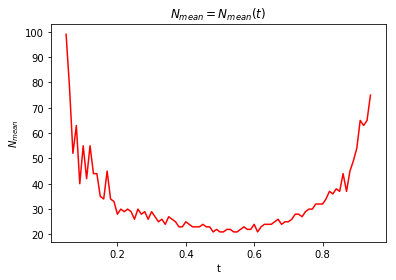

In [9]:
import math
import numpy as np
from pylab import *
%matplotlib inline
def f(x): #Определяем целевую функцию
    return(x * math.exp(x) + math.sin(math.exp(x)))
eps = 1e-7
a = -5
b = 0
def x(t, a, b): #Определяем функцию деления отрезка в заданной пропорции
    return(a + (b - a)*t)
def experiment1(f, x, eps, t, a, b): #Эксперимент1
    a0 = a
    b0 = b
    c0 = x(t, a0, b0)
    s = [c0]
    k = 0
    while(max(b0 - c0, c0 - a0) >= eps):
        y = x(t, a0, c0)
        f1 = f(y)
        if (f1 <= f(c0)):
            b0 = c0
            c0 = y
            k += 1
            s.append(c0)
        else:
            z = x(t, y, b0)
            if (z >= c0): #точка z может лежать как слева от c0, так и справа#
#На самом деле, я не уверен, что один из варинатов может быть
#Вроде как всегда выполнено $z >= c0$ и это можно показать по формулам, хотя 
#я не берусь это утверждать
#Без первого условия код виснет, так что рассмотрю оба варианта
#В крайнем случае, будет просто кусок неисполняемого кода
                f2 = f(z)
                if (f(c0) <= f2):
                    a0 = y
                    b0 = z
                    c0 = x(t, y, z)
                    s.append(c0)
                else:
                    a0 = c0
                    c0 = x(t, a0, b0)
                    s.append(c0)
                k += 1
            else:
                f2 = f(z)
                if (f(c0) >= f2):
                    a0 = y
                    b0 = c0
                    c0 = x(t, y, z)
                    s.append(c0)
                else: #если f(c0) <= f(z) и f(c0) < f(y), y < z < c0, то
                    #в силу унимодальности f должно быть f(z) < f(y)
                    a0 = z
                    c0 = x(t, a0, b0)
                    s.append(c0)
                k += 1
    return(k)
experiments1 = np.arange(0.05, 0.95, 0.01) #генерируем массив t от 0.05 до 
    #0.95 с шагом 0.01
#ВОТ НА ЭТОМ МЕСТЕ Я БЕЗ ПОНЯТИЯ, ЗАЧЕМ ЗАПУСКАТЬ АЛГОРИТМ НЕСКОЛЬКО РАЗ
#При заданных a,b,eps,f алгоритм будет детерминированным при фиксированном t
times = 5 #число проведения экспериментов 
i = 0 
results1 = [experiment1(f, x, eps, t, a, b) for t in experiments1] #в этот
    #массив будем записывать усреднённое значение после times экспериментов
while (i < times - 1): #проведение экспериментов с фиксированным шагом
    resi = [experiment1(f, x, eps, t, a, b) for t in experiments1]
    for j in range(len(results1)):
        results1[j] += resi[j]
    i += 1
for i in range(len(results1)):
    results1[i] = results1[i]/times
figure() #Строим график N_mean(t)
plot(experiments1, results1, 'r')
xlabel('t')
ylabel('$N_{mean}$')
title('$N_{mean} = N_{mean}(t)$')
show() #Видим характерный минимум около t = 0.5 - метода дихотомии 
#для нашей точности eps минимальное число необходимых итераций чуть больше 20

# Напишем код, аналогичный методу дихотомии со случайным шагом t

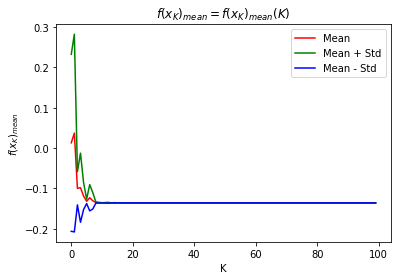

In [10]:
import random
def experiment2(f, x, K, a, b): #Эксперимент2 со случайным шагом с K 
                                        #итерациями
#Использую предыдущий код с небольшими изменениями
    a0 = a
    b0 = b
    t = random.uniform(0, 1) #рандомизацию t провожу при каждом k
#единственный раз; можно было бы рандомизировать и при выборах y, z
    c0 = x(t, a0, b0)
    s = [c0]
    k = 0
    while(k < K):
        t = random.uniform(0, 1)
        y = x(t, a0, c0)
        f1 = f(y)
        if (f1 <= f(c0)):
            b0 = c0
            c0 = y
            k += 1
            s.append(c0)
        else:
            z = x(t, y, b0)
            if (z >= c0): #точка z может лежать как слева от c0, так и справа#
                f2 = f(z)
                if (f(c0) <= f2):
                    a0 = y
                    b0 = z
                    c0 = x(t, y, z)
                    s.append(c0)
                else:
                    a0 = c0
                    c0 = x(t, a0, b0)
                    s.append(c0)
                k += 1
            else:
                f2 = f(z)
                if (f(c0) >= f2):
                    a0 = y
                    b0 = c0
                    c0 = x(t, y, z)
                    s.append(c0)
                else: #если f(c0) <= f(z) и f(c0) < f(y), y < z < c0, то
                    #в силу унимодальности f должно быть f(z) < f(y)
                    a0 = z
                    c0 = x(t, a0, b0)
                    s.append(c0)
                k += 1
    return(f(s[k]))
times = 33 #число экспериментов для усреднения
i = 0 
Nmax = 100 #максимальное число итераций
experiments2 = np.arange(0, Nmax, 1) #генерируем массив числа допустимых 
    #итераций для алгоритма
results2 = [experiment2(f, x, K, a, b) for K in experiments2] #в этот
    #массив будем записывать усреднённое значение после times экспериментов
Result = [results2]
while (i < times - 1): #проведение экспериментов с фиксированным шагом
    resi = [experiment2(f, x, K, a, b) for K in experiments2]
    Result.append(resi)
    i += 1
Mean = []
Std = []
MeanStd1 = []
MeanStd2 = []
len1 = len(experiments2)
for i in range(len1): #проводим times экспериментов и вычисляем mean, std
    Mean.append(mean([Result[k][i] for k in range(times)]))
    Std.append(std([Result[k][i] for k in range(times)]))
    MeanStd1.append(mean([Result[k][i] for k in range(times)]) +
                    std([Result[k][i] for k in range(times)]))
    MeanStd2.append(mean([Result[k][i] for k in range(times)]) -
                    std([Result[k][i] for k in range(times)]))
figure() #Строим график f(x_K)_mean(K)
plot(experiments2, Mean, 'r', label="Mean")
plot(experiments2, MeanStd1, 'g', label="Mean + Std")
plot(experiments2, MeanStd2, 'b', label="Mean - Std")
plt.legend()
xlabel('K')
ylabel('$f(x_K)_{mean}$')
title('$f(x_K)_{mean} = f(x_K)_{mean}(K)$')
show() #Видим, что метод сходится к минимуму довольно быстро, достаточно 
#около 15 шагов при усреднении в 33 экспериментах, чтобы дисперсия была малой
#Полученное число шагов будет меньше, чем при фиксированным шаге
#Хотя, чтобы утверждать это, требуется быть уверенным, что мы добились 
#eps-точности. Отдельно я не проверял это. Этот результат позволяет сделать 
#вывод, что рандомизация бывает полезно. Конечно, мы не можем на основании 
#этого утверждать, что предложенный метод лучше обычного метода дихотомии -
#это зависит от типа минимизируемой функции и eps-точности.